In [4]:
import sys, os, os.path
import glob
import math

In [5]:
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [6]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
data_root = "/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF"
data_dir  = "SF_0.1"

In [9]:
data_path = os.path.join(data_root, data_dir)

In [10]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [11]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()

In [12]:
data_files

['/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000000',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000010',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000020',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000030',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000040',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000050',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000060',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000070',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000080',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000090',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/Vary_SF/SF_0.1/plt0000100',
 '/home/malvarado/FHDeX/exec/imm

### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="concentration"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

def plot_frame(index, data_files, n_fill):
    prefix   = "frame_"
    file_fmt = prefix + "{:0" + str(n_fill) + "d}.png"
    
    # legacy
    substitute_header(data_files[index])
    
    ds = yt.load(data_files[index])
    
    slc = yt.SlicePlot(ds, "x", "concentration")
    slc.set_log("concentration", False)
    slc.set_zlim("concentration", 1e-100, 1e-5)
    
    #slc.show()
    slc.save(file_fmt.format(index))

# for i in range(0, len(data_files)):
    plot_frame(i, data_files, 4)

In [40]:
# to stitch together the movie:
#    ffmpeg -pattern_type glob -i "frame_*.png" movie.mpeg

num_frames = 50
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i])    
    slc = yt.SlicePlot(ds, "z", "C")
    slc.zoom(2)
    slc.set_log("C", False)
    slc.set_zlim("C", 1e-100, 7e-4)
    slc.annotate_quiver('averaged_velx', 'averaged_vely',scale=0.03)
    #slc.show()
    slc.save('velocityquiver_%.4d.png' % i)

yt : [INFO     ] 2019-08-02 13:59:53,571 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-08-02 13:59:53,579 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 13:59:53,581 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 13:59:53,582 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 13:59:53,959 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:53,960 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:53,962 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:53,963 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:53,965 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/site

yt : [INFO     ] 2019-08-02 14:00:08,067 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-08-02 14:00:08,849 Saving plot velocityquiver_0005.png
yt : [INFO     ] 2019-08-02 14:00:09,550 Parameters: current_time              = 0.060000000000000046
yt : [INFO     ] 2019-08-02 14:00:09,552 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 14:00:09,553 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 14:00:09,554 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 14:00:09,860 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:09,861 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:09,863 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:09,864 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:09,866 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colo

yt : [INFO     ] 2019-08-02 14:00:25,022 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 14:00:25,027 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 14:00:25,351 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:25,352 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:25,354 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:25,355 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:25,358 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 14:00:25,973 Making a fixed resolution buff

yt : [INFO     ] 2019-08-02 14:00:40,955 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:40,959 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 14:00:41,376 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-08-02 14:00:41,970 Saving plot velocityquiver_0018.png
yt : [INFO     ] 2019-08-02 14:00:42,770 Parameters: current_time              = 0.19000000000000014
yt : [INFO     ] 2019-08-02 14:00:42,773 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 14:00:42,774 Parameters: domain_left_edge        

/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 14:00:57,370 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-08-02 14:00:57,941 Saving plot velocityquiver_0024.png
yt : [INFO     ] 2019-08-02 14:00:58,931 Parameters: current_time              = 0.25000000000000017
yt : [INFO     ] 2019-08-02 14:00:58,932 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 14:00:58,933 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 14:00:58,934 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 14:00:59,264 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:59,265 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:59,267 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:00:59,268 ylim = 0.000000 1.000

yt : [INFO     ] 2019-08-02 14:01:13,635 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 14:01:13,637 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 14:01:13,640 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 14:01:14,087 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:14,090 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:14,094 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:14,097 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:14,100 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.

yt : [INFO     ] 2019-08-02 14:01:30,791 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:30,792 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:30,793 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 14:01:31,451 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-08-02 14:01:32,212 Saving plot velocityquiver_0037.png
yt : [INFO     ] 2019-08-02 14:01:33,661 Parameters: current_time              = 0.3800000000000003
yt : [INFO     ] 2019-08-02 14:01:33,662 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO  

/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 14:01:46,553 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-08-02 14:01:47,341 Saving plot velocityquiver_0043.png
yt : [INFO     ] 2019-08-02 14:01:48,783 Parameters: current_time              = 0.44000000000000034
yt : [INFO     ] 2019-08-02 14:01:48,786 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 14:01:48,790 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 14:01:48,791 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-08-02 14:01:49,069 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:49,070 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:49,071 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 14:01:49,072 ylim = 0.000000 1.000

In [36]:


#yt.define_unit("millimeter", (1.0, "cm"))


ds = yt.load(data_files[15])


yt : [INFO     ] 2019-08-02 13:59:09,392 Parameters: current_time              = 0.1500000000000001
yt : [INFO     ] 2019-08-02 13:59:09,393 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-08-02 13:59:09,394 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-08-02 13:59:09,402 Parameters: domain_right_edge         = [1. 1. 1.]


In [37]:
ds.field_list

[('boxlib', 'C'),
 ('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'dCdx'),
 ('boxlib', 'dCdx_cen'),
 ('boxlib', 'dCdy'),
 ('boxlib', 'dCdy_cen'),
 ('boxlib', 'dCdz'),
 ('boxlib', 'dCdz_cen'),
 ('boxlib', 'divergence'),
 ('boxlib', 'force_ibm_x'),
 ('boxlib', 'force_ibm_y'),
 ('boxlib', 'force_ibm_z'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_force_ibm_x'),
 ('boxlib', 'shifted_force_ibm_y'),
 ('boxlib', 'shifted_force_ibm_z'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer'),
 ('boxlib', '|Dc|')]

yt : [INFO     ] 2019-08-02 13:59:13,753 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:13,754 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:13,755 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:13,767 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:13,769 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 13:59:14,326 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800



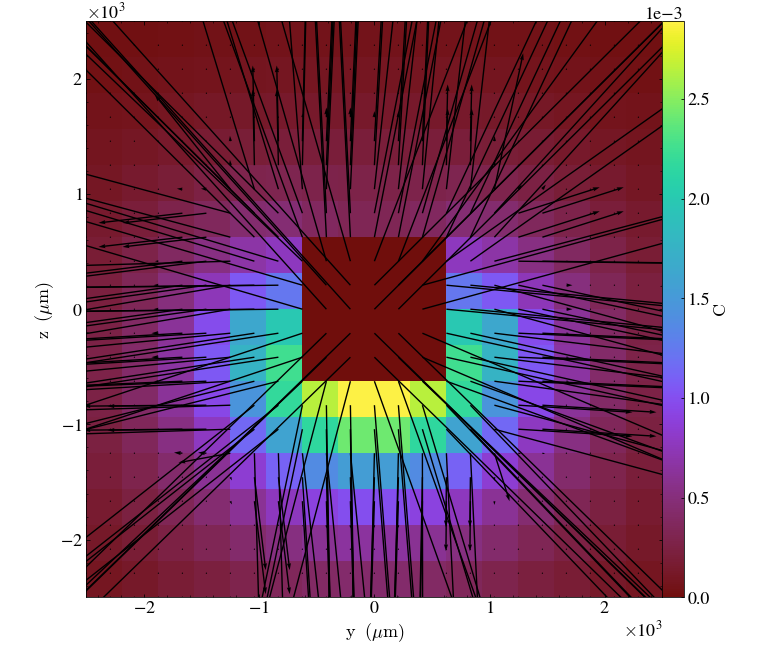

In [38]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('force_ibm_y', 'force_ibm_z',scale=10, factor=32)
slc.zoom(2)
slc.show()

yt : [INFO     ] 2019-08-02 13:59:20,816 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:20,818 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:20,824 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:20,827 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:59:20,924 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-08-02 13:59:21,168 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800



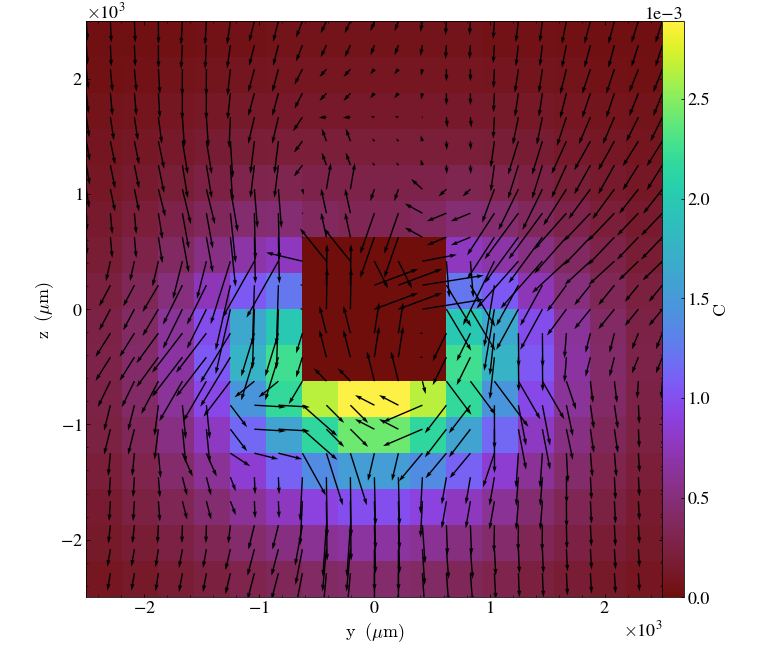

In [39]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#width=(10.,"mm")
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('averaged_vely', 'averaged_velz',scale=0.05,factor=32)
slc.zoom(2)
slc.show()
#slc.save("step_0.png")

In [287]:
num_frames = 200
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i]) 

    slc = yt.SlicePlot(ds, "z", "|Dc|")
    slc.set_log("|Dc|", False)
    slc.set_zlim("|Dc|", 1e-100, 8e-3)
    slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=0.15)
    slc.zoom(2)
    #slc.show()
    slc.save('gradientquiver_%.4d.png' % i)

yt : [INFO     ] 2019-07-31 16:47:46,212 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-31 16:47:46,215 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 16:47:46,216 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 16:47:46,217 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 16:47:46,840 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,854 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,859 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,866 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,869 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [WARNING  ] 2019-07-31 16:47:46,981 Plot image for field ('boxlib', '|Dc|') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2019-07-31 16:47:47,003 Switching to linear colorbar scaling.
yt : [INFO     ] 2019-07-31 16:47:47,650 Making a fixed reso

IndexError: list index out of range

yt : [INFO     ] 2019-08-02 13:54:29,599 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:54:29,601 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:54:29,605 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:54:29,611 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-08-02 13:54:29,613 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-08-02 13:54:30,411 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



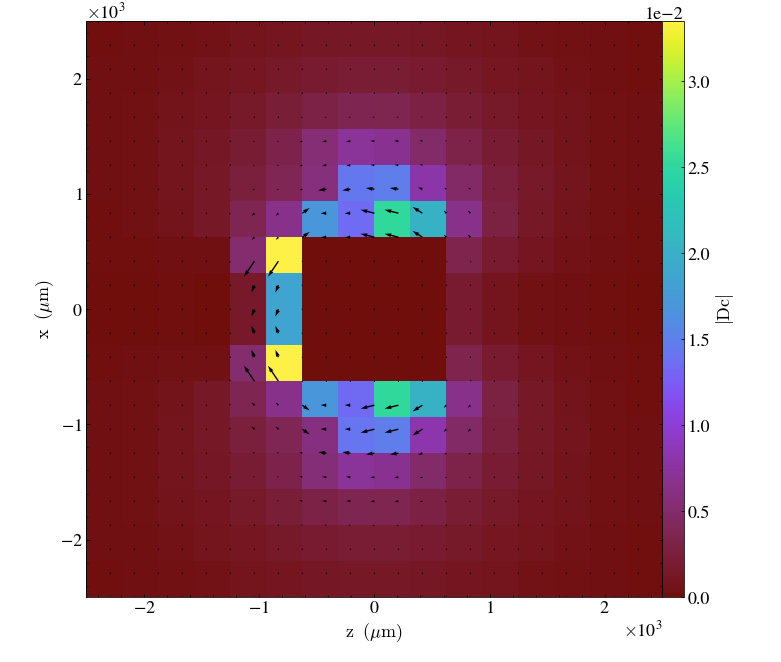

In [16]:
 slc = yt.SlicePlot(ds, "y", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
#slc.annotate_quiver('slipvel_x', 'slipvel_y',scale=1)
slc.zoom(2)
slc.annotate_quiver('dCdz_cen', 'dCdx_cen',scale=1, factor=32)
slc.show()

##### sc = yt.create_scene(ds, 'C')
im, sc = yt.volume_render(ds, 'C')
sc.show()

In [ ]:
slc = yt.SlicePlot(ds, "y", "dCdz_cen")
slc.set_log("dCdz_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

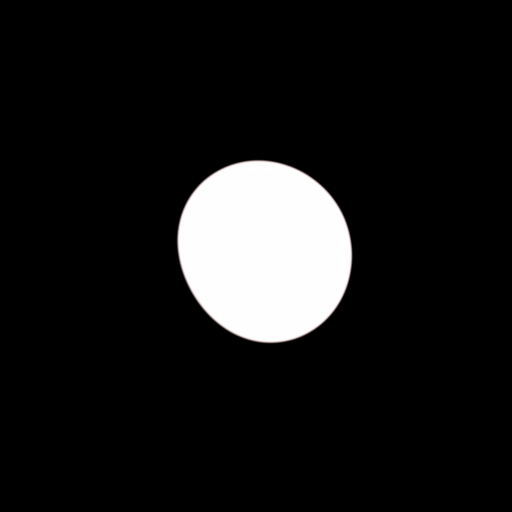

In [92]:
sc.camera.width = (300, 'kpc')
sc.show()


In [ ]:
slc.annotate_quiver('dCdx_cen', 'dCdy_cen')

yt : [INFO     ] 2019-07-17 10:53:32,733 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,736 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,748 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



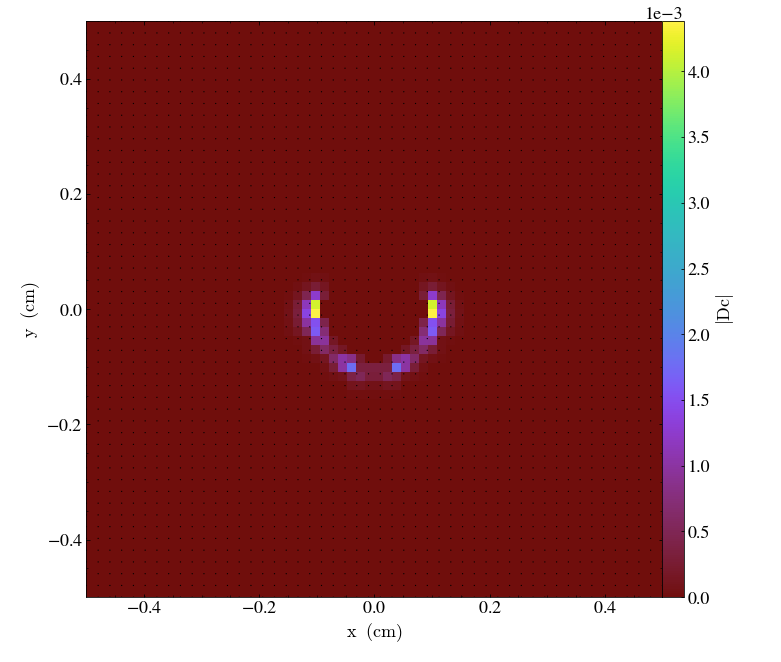

In [161]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=100000)
slc.show()

(x,  y,  z) C
-----------------------


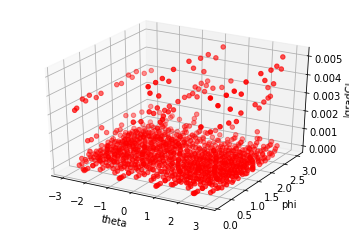

In [162]:
sp= ds.sphere("c", (.1, "cm"))
p=sp["C"]
import array

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

#phi1= np.zeros(len(C), dtype = float)#np.array('d');
#theta1= np.zeros(len(C), dtype = float)
#C1= np.zeros(len(C), dtype = float)
#Cdx1= np.zeros(len(C), dtype = float)
#Cdy1= np.zeros(len(C), dtype = float)
#Cdz1= np.zeros(len(C), dtype = float)
phi1=array.array('d');
theta1=array.array('d');
C1=array.array('d');
Cdx1=array.array('d');
Cdy1=array.array('d');
Cdz1=array.array('d');
gradCmag1=array.array('d');
from yt.units import cm
cen=0.5*cm
#print(p)
#plot(p)
#plot = yt.ProfilePlot(p, "radius", "C")

#plot = yt.ProfilePlot(sp,"Psi", "C")

print("(x,  y,  z) C")

print("-----------------------")
for count in range(sp["C"].size):
   j=count
   k=count
   i=count
   phi=(math.acos((sp["z"][k]-cen)/math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2)))
   theta=(math.atan2((sp["y"][j]-cen),(sp["x"][i]-cen)))
   gradCmag=math.sqrt((sp["dCdx"][j])**2+(sp["dCdy"][k])**2+(sp["dCdz"][i])**2)
   phi1.append(phi)
   theta1.append(theta)
   #print( theta, sp["y"][j]-cen, sp["x"][i]-cen, (sp["y"][j]-cen)/(sp["x"][i]-cen) )
  # print( math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2))
   C1.append(sp["C"][count])
   Cdx1.append(sp["dCdx"][count])
   Cdy1.append(sp["dCdy"][count])
   Cdz1.append(sp["dCdz"][count])
   gradCmag1.append(gradCmag)
  # print("(%f,  %f,  %f)    %f", (phi1, theta1, sp["C"][i]))
    
    #phi1=math.acos((sp["x"][i])/sp["z"][i])
#plot.set_unit('radius', 'cm')
#p.show()
#vec1=numpy.argsort(phi1)
#print(vec1)
#C2 = np.zeros(len(vec1), dtype = float) 
#for i in range(0, len(vec1)): 
#    C2[i]= C1[vec1[i]] 
    #print('Sorted array->', C1[vec1[i]]) 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.

# Plot the surface.
#surf = ax.plot_surface(phi1, theta1, Cdx1, linewidth=0, antialiased=False)#, cmap=cm.coolwarm,
                      # )
ax.scatter(theta1, phi1, gradCmag1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('|gradC|')
plt.show()

#plt.scatter(phi1, Cdy1)
#axes = plt.gca()
#axes.set_xlim([0, 3.14])
#axes.set_ylim([-0.003,0.003])

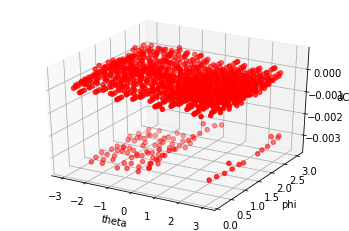

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdx')
plt.show()

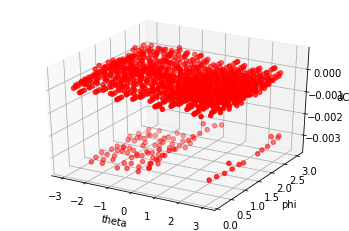

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdy')
plt.show()

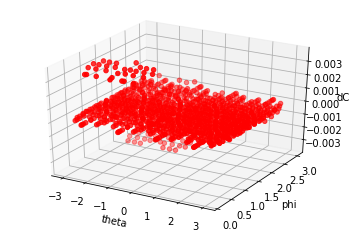

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdz1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdz')
plt.show()